# Probability Distribution

확률 분포

In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

# 노트북 셀 표시를 브라우저 전체 폭 사용하기
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import clear_output

%matplotlib inline
import matplotlib.pyplot as plt

import os, sys, shutil, functools
import collections, pathlib, re, string

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=5)
np.set_printoptions(formatter={'float_kind': "{:.5f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import scipy as sp

import seaborn as sns

from pydataset import data

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"scipy ver={sp.__version__}")

python ver=3.8.9 (default, Jun 27 2021, 02:41:12) 
[GCC 7.5.0]
pandas ver=1.2.5
numpy ver=1.19.5
scipy ver=1.6.3


In [2]:
# Iris 데이터 셋의 컬럼 정보 살피기
df_iris = data('iris')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## 확률과 확률 분포 (Probability and Probability Distribution)

주사위를 실제 던져보기 전까지는 주사위의 어떤 수가 나오게 될지 알수 없지만 주사위를 던졌을 때 각 수가 나오는 가능성은 1/6 으로 예측 할 수 있습니다. 추측 통계에서는 결과 예측시 확률과 확률의 분포를 이용합니다.

* 사상: 시행 (실험, 관측 등)에 의해 생긴 결과 (주사위 예에서는 던져서 나온 수)
* 확률: 사상이 어느정도 일어나기 쉬운지를 수치화, 모든 사상의 합은 1 (주사위 예에서는 각 눈의 확률)
* 확률변수: 시행해 봐야 결과를 알 수 있는 변수를 확률 변수라 정의
  * 이산확률변수: 변수가 취할 수 있는 값이 이산형인 확률 변수 (예, 주사위, 동전 등)
  * 연속확률변수: 변수가 취할 수 있는 값이 연속형인 활률 변수 (예, 키, 몸무게 등)
* 확률분포: 확률 변수(전체 합 = 1)가 취할 수 있는 값이 어떻게 분포하고 있는지 나타냄

![](https://tinyheero.github.io/assets/prob-distr/overview-prob-distr.png)

https://tinyheero.github.io/2016/03/17/prob-distr.html

**Further Reading**
* [Probability Distributions in Python Tutorial](https://www.datacamp.com/community/tutorials/probability-distributions-python)

**도수분포표 (Frequency Distribution Table)**

도수분포표는 데이터를 계급으로 나누고 계급에 대한 빈도를 세어 표시하는 테이블입니다. 범주형 변수의 경우는 간단하게 구할 수 있지만, 연속형 변수의 경우에는 어떻게 계급을 나누어 표시해야 하는지에 대한 어려운 부분이 존재합니다. 

연속형 변수의 적장한 계급 수를 구하는 방법은 주로 Sturge’s rule 또는 Freedman-Diaconis rule 을 사용합니다.

**Sturge's rule**

![](https://miro.medium.com/max/324/1*E2cFPT9fMhdF74FVANGchQ.png)

**Freedman-Diaconis rule**

![](https://miro.medium.com/max/409/1*K04B59josTwu3Yp2acpfmA.png)

https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8


In [3]:
df_iris = data('iris')

# 범주형 변수의 도수 분포표
fdt = pd.crosstab(index=df_iris['Species'], columns='frequency')
fdt['cumulative_frequency'] = fdt['frequency'].cumsum() # 누적도수
fdt['relative_frequency'] = fdt['frequency'] / fdt['frequency'].sum() # 상대도수
fdt

col_0,frequency,cumulative_frequency,relative_frequency
Species,,,
setosa,50,50,0.33333
versicolor,50,100,0.33333
virginica,50,150,0.33333


In [4]:
# 연속형 변수의 도수 분포표
# Sturges's Rule 에 따른 Binning 
n_data = df_iris['Sepal.Length'].count()
n_bins = int(np.ceil(np.log2(n_data) + 1))
bins = pd.cut(x=df_iris['Sepal.Length'], bins=n_bins, right=False)
fdt = pd.crosstab(index=bins, columns='frequency')
fdt['cumulative_frequency'] = fdt['frequency'].cumsum() # 누적도수
fdt['relative_frequency'] = fdt['frequency'] / fdt['frequency'].sum() # 상대도수
fdt['cumulative_relative_frequency'] = fdt['relative_frequency'].cumsum() # 누적상대도수
fdt

col_0,frequency,cumulative_frequency,relative_frequency,cumulative_relative_frequency
Sepal.Length,,,,
"[4.3, 4.7)",9,9,0.06000,0.06000
"[4.7, 5.1)",23,32,0.15333,0.21333
"[5.1, 5.5)",20,52,0.13333,0.34667
"[5.5, 5.9)",28,80,0.18667,0.53333
"[5.9, 6.3)",28,108,0.18667,0.72000
"[6.3, 6.7)",14,122,0.09333,0.81333
"[6.7, 7.1)",17,139,0.11333,0.92667
"[7.1, 7.5)",5,144,0.03333,0.96000
"[7.5, 7.904)",6,150,0.04000,1.00000


**히스토그램 (Histogram)**

도수분포표를 통해 구한 계급 구간을 이용하여 히스토그램으로 데이터를 시각화 하여 살펴 봅니다. 히스토그램을 통한 데이터 시각화를 하면 좀 더 데이터 분포에 대하여 직관적으로 살펴볼 수 있습니다.

<AxesSubplot:>

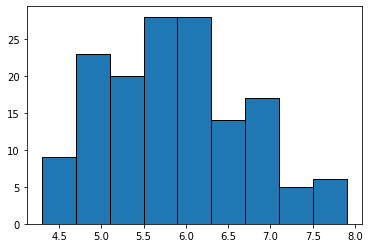

In [5]:
# Pandas를 이용한 시각화
df_iris['Sepal.Length'].hist(bins=n_bins, grid=False, edgecolor='black')

Text(0.5, 1.0, 'bins = 9')

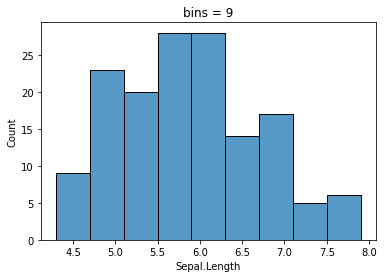

In [6]:
# Seaborn을 이용한 시각화
sns.histplot(x=df_iris['Sepal.Length'],bins=n_bins)
plt.title(f'bins = {n_bins}')

## 이산확률분포

확률변수가 취할 수 있는 값이 이산적인 확률변수

**확률질량함수(Probability mass function)**

확률변수 X 가 취할 수 있는 값에 대한 집합 $X = {x_1, x_2, x_3, ...}$ 일때, 확률변수 X가 $x_k$를 취할 확률

$$f(x) = P(X = x_k) = p_k \quad (k = 1, 2, 3, ...)$$
$$f(x) = 0 \quad (otherwise)$$

**누적분포함수(Cumulative distribution function)**

확률변수 X가 x이하가 될 때의 확률

$$F(x) = P(X \leq x_k) = \sum_{x_k \leq x}f(x_k)$$ 

**기대값(Expted value)**

확률변수의 평균

$$E(X) = \sum_kx_kf(x_k)$$

**분산(Variance)**

$$V(X) = \sum_k(x_k - \mu)^2f(x_k)$$

### 이산균등분포 (Discrete Uniform Distribution)

사상이 일어나는 확률이 같은 분포, 확률변수가 x = {1, ..., n} 1,2,3, .. 값은 이산 값을 취할때,

**확률질량함수**

베르누이 분포에서 1이 나오는 확률을 p 라고 할때, 

$$f(x) = \frac{1}{n} \quad (x \in {1, 2, ..., n})$$
$$f(x) = 0 \quad (otherwise)$$

**기대값과 분산**

$$E(X) = \frac{n+1}{2} \quad V(X) = \frac{n^2 - 1}{12}$$

![](https://www.researchgate.net/profile/Lakshmi-Padmaja-Dhyaram/publication/319013233/figure/fig3/AS:525690496917504@1502345789065/Uniform-Distribution-Types.png)

https://www.researchgate.net/figure/Uniform-Distribution-Types_fig3_319013233

**Further Reading**
* [이산균등분포](https://ko.wikipedia.org/wiki/%EC%9D%B4%EC%82%B0%EA%B7%A0%EB%93%B1%EB%B6%84%ED%8F%AC)
* [Discrete uniform distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)

[Text(0.5, 0, 'Distribution '), Text(0, 0.5, 'Frequency')]

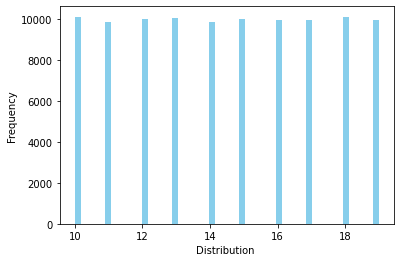

In [7]:
rv = sp.stats.randint(low=10, high=20)
rvs = rv.rvs(size=100000)
ax = sns.distplot(rvs, bins=50, kde=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution ', ylabel='Frequency')

### 베르누이분포

확률변수가 취할 수 있는 값이 0/1 밖에 없는 분포, 가장 기본적인 이산형 확률분포

**확률질량함수**

베르누이 분포에서 1이 나오는 확률을 p 라고 할때, 

$$f(x) = p^x(1-p)^{(1-x)} \quad (x \in {0, 1})$$
$$f(x) = 0 \quad (otherwise)$$

**기대값과 분산**

$$E(X) = p\quad V(X) = p(1-p)$$

f(0)=0.700, f(1)=0.300
F(0)=0.700, F(1)=1.000
E(X)=0.300, V(X)=0.210


[Text(0.5, 0, 'Distribution '), Text(0, 0.5, 'Frequency')]

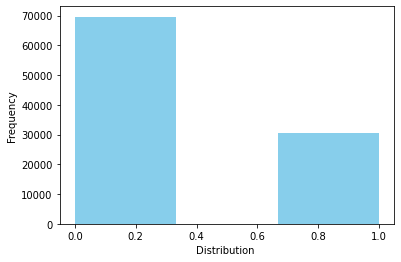

In [8]:
p = 0.3
rv = sp.stats.bernoulli(p)
print(f"f(0)={rv.pmf(0):.3f}, f(1)={rv.pmf(1):.3f}")
print(f"F(0)={rv.cdf(0):.3f}, F(1)={rv.cdf(1):.3f}")
print(f"E(X)={rv.mean():.3f}, V(X)={rv.var():.3f}")

rvs = rv.rvs(size=100000)
ax = sns.distplot(rvs, bins=3, kde=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution ', ylabel='Frequency')

### 이항분포 (Binomial Distribution)

성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

**확률질량함수**

연속된 n번의 독립적 시행에서 각 시행이 성공 확률 p를 가질 때, 

$$f(x) = nCxp^x(1-p)^{(n-x)} \quad (x \in {0, 1, 2, ... n})$$
$$f(x) = 0 \quad (otherwise)$$

**기대값과 분산**

$$E(X) = np\quad V(X) = np(1-p)$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Binomial_distribution_pmf.svg/300px-Binomial_distribution_pmf.svg.png)

https://en.wikipedia.org/wiki/Binomial_distribution

**Further Reading**
* [이항 분포](https://ko.wikipedia.org/wiki/%EC%9D%B4%ED%95%AD_%EB%B6%84%ED%8F%AC)
* [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

f(1)=0.010, f(8)=0.044
F(1)=0.011, F(8)=0.989
E(X)=5.000, V(X)=2.500


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

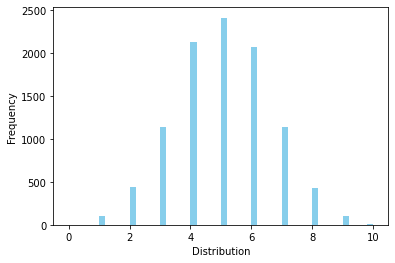

In [9]:
# 성공확률이 0.5인 동전던지기에서 10번 수행시 성공확률
n = 10
p = 0.5
rv = sp.stats.binom(n=n,p=p)
print(f"f(1)={rv.pmf(1):.3f}, f(8)={rv.pmf(8):.3f}")
print(f"F(1)={rv.cdf(1):.3f}, F(8)={rv.cdf(8):.3f}")
print(f"E(X)={rv.mean():.3f}, V(X)={rv.var():.3f}")

rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, kde=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

### 기하분포 (Geometric Distribution)

베르누이 시행에서 처음 성공할때까지 반복한 시행 횟수가 따르는 분포

**확률질량함수**

성공 확률이 p이고, 확률변수의 값이 1 이상인 정수일때(기하분포는 첫성공 후, 연속 실패 가능성이 있기 때문),

$$f(x) = (1-p)^{(x-1)}p \quad (x \in {1, 2, ... n})$$
$$f(x) = 0 \quad (otherwise)$$

**기대값과 분산**

$$E(X) = \frac{1}{p} \quad V(X) = \frac{(1-p)}{p^2}$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Geometric_pmf.svg/450px-Geometric_pmf.svg.png)

https://en.wikipedia.org/wiki/Geometric_distribution

**Further Reading**
* [Geometric distribution](https://en.wikipedia.org/wiki/Geometric_distribution)

f(1)=0.500, f(8)=0.004
F(1)=0.500, F(8)=0.996
E(X)=2.000, V(X)=2.000


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

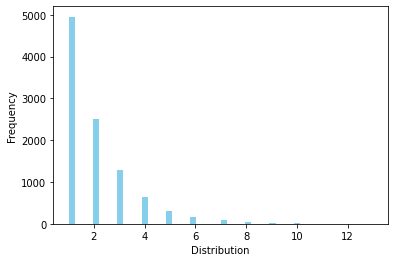

In [10]:
# 성공확률이 0.5인 동전던지기에서 x번 시행시 성공할 확률
p = 0.5
rv = sp.stats.geom(p=p)
print(f"f(1)={rv.pmf(1):.3f}, f(8)={rv.pmf(8):.3f}")
print(f"F(1)={rv.cdf(1):.3f}, F(8)={rv.cdf(8):.3f}")
print(f"E(X)={rv.mean():.3f}, V(X)={rv.var():.3f}")

rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, kde=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

### 포아송 분포 (Poisson Distribution)

시행 횟수가 많고, 사상 발생의 확률은 아주 작은 이항분포, 단위 시간 또는 단위 공간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포

**확률질량함수**

정해진 시간 안에 어떤 사건이 일어날 횟수에 대한 기댓값이 $\lambda = np$ 일때, 그 사건이 x 회 일어날 확률  

$$f(x) = \frac{\lambda^x e^{-\lambda}}{x!} \quad (x \in {0, 1, 2, ... n})$$
$$f(x) = 0 \quad (otherwise)$$

**기대값과 분산**

$$E(X) = \lambda \quad V(X) = \lambda$$

$\lambda$ 값이 커질 수록 정규분포에 가까워짐

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/325px-Poisson_pmf.svg.png)

https://en.wikipedia.org/wiki/Poisson_distribution

**Further Reading**
* [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

f(1)=0.271, f(8)=0.001
F(1)=0.406, F(8)=1.000
E(X)=2.000, V(X)=2.000


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

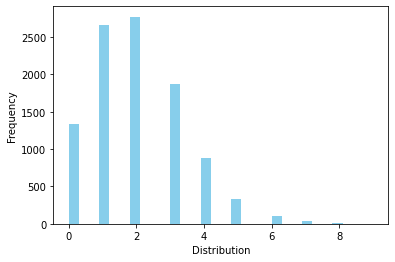

In [11]:
# 평균 불량율이 2인 제품 생산시 불량이 1개(x = 1)발생할 확률
p = 0.002
n = 1000
l = n*p
rv = sp.stats.poisson(l)

print(f"f(1)={rv.pmf(1):.3f}, f(8)={rv.pmf(8):.3f}")
print(f"F(1)={rv.cdf(1):.3f}, F(8)={rv.cdf(8):.3f}")
print(f"E(X)={rv.mean():.3f}, V(X)={rv.var():.3f}")

# 포아송분포에서 실제 10000개 랜덤 샘플링 후 시각화
rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, bins=30, kde=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

## 연속확률분포

확률변수가 취할 수 있는 값이 연속적인 확률변수

**확률밀도함수(Probability density function)**

확률변수 X 가 취할 수 있는 값에 대한 집합 $X = {x_1, x_2, x_3, ...}$ 일때, 확률변수 X가 $x_k$를 취할 확률

$$f(x) = P(x0 \geq X \leq x_1) = \int_{x0}^{x1}f(x)dx $$

**누적분포함수(Cumulative distribution function)**

확률변수 X가 x이하가 될 때의 확률

$$F(x) = P(X \leq x) = \int_{- \infty}^{x}f(x)dx$$ 

**기대값(Expted value)**

확률변수의 평균

$$E(X) = \int_{- \infty}^{\infty}xf(x)dx$$

**분산(Variance)**

$$V(X) = \int_{- \infty}^{\infty}(x - E(X))^2f(x)dx$$

### 연속균등분포 (Continuous Uniform Distribution)

사상이 일어나는 확률이 같은 분포, 확률변수가 x = $[\alpha, \beta]$ 사이에 연속적인 값을 취할때,


**확률밀도함수**

$$f(x) = \frac{1}{\beta - \alpha} \quad (x \in [\alpha, \beta])$$
$$f(x) = 0 \quad (otherwise)$$

**기대값과 분산**

$$E(X) = \frac{\alpha + \beta}{2} \quad V(X) = \frac{(\beta - \alpha)^2}{12}$$

![](https://www.researchgate.net/profile/Lakshmi-Padmaja-Dhyaram/publication/319013233/figure/fig3/AS:525690496917504@1502345789065/Uniform-Distribution-Types.png)

https://www.researchgate.net/figure/Uniform-Distribution-Types_fig3_319013233

**Further Reading**
* [연속균등분포](https://ko.wikipedia.org/wiki/%EC%97%B0%EC%86%8D%EA%B7%A0%EB%93%B1%EB%B6%84%ED%8F%AC)
* [Continuous uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

[Text(0.5, 0, 'Distribution '), Text(0, 0.5, 'Frequency')]

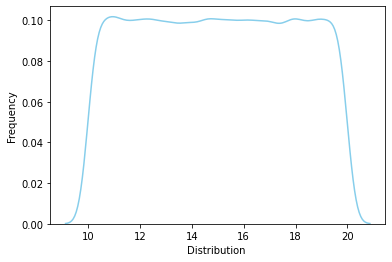

In [12]:
rv = sp.stats.uniform(loc=10, scale=10)
rvs = rv.rvs(size=100000)
ax = sns.distplot(rvs, bins=100, kde=True, hist=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution ', ylabel='Frequency')

### 정규분포 (Normal Distribution)

평균값을 중심으로 대칭을 이루는 종 모양의 분포, 자연에서 일어나는 많은 수의 데이터들이 정규분포를 따르는 경우가 많기 때문에 통계학에서 
가장 중요하게 다루는 분포입니다.

**확률밀도함수**

$$f(x) = \frac{1}{\sqrt{2\pi\sigma}}exp\{-\frac{(x-\mu)^2}{2\sigma^2}\} \quad (-\infty < x < \infty)$$

**기대값과 분산**

$$E(X) = \mu \quad V(X) = \sigma^2$$

**표준정규분포(Z Distribution)**

표준졍규분포는 데이터의 평균값을 0으로 표준편차를 1로 변환하여 데이터의 척도에 상관 없이 사용할 수 있도록 표준화한 분포입니다. 

표준화변량 (Z-Score)

$$Z = \frac{x-\mu}{\sigma}$$

표준화변량(Z-score)를 이용하면 평균과 표준편차가 다른 두 집단에 속한 데이터가 표준 정규 분포 상의 어느 확률 지점에 존재하는지 같은 기준을 통해 비교해 볼수 있게 됩니다. 예를 들면, 사내 어학연수 선발에서 토익성적만 있는 지원자와 토플성적만 있는 지원자 중 선발이 필요할 경우 직접적 비교가 어렵지만, 두 지원자의 점수를 Z-score로 표준화하여 같은 분포상에서 비교한다면 선발이 가능하게 됩니다.

![](https://mathbitsnotebook.com/Algebra2/Statistics/zscore3.png)

https://mathbitsnotebook.com/Algebra2/Statistics/STzScores.html

**왜도와 첨도(Skew & Kurtosis)**

표준분포의 모양이 정규분포에서 어느정도 벗어나는지를 측정하기 위한 지표

왜도 (Skew)

$$S_w = \frac{1}{n}\sum_{i=1}^{n}(\frac{x_i-\mu}{\sigma})^3$$ 

첨조 (Kurtosis)

$$S_k = \frac{1}{n}\sum_{i=1}^{n}(\frac{x_i-\mu}{\sigma})^4 - 3$$ 

![](https://www.researchgate.net/profile/Attila-Bonyar/publication/298415862/figure/fig1/AS:340236723867648@1458130164255/Illustration-of-the-skewness-and-kurtosis-values-and-how-they-correlate-with-the-shape-of.png)

https://www.researchgate.net/figure/Illustration-of-the-skewness-and-kurtosis-values-and-how-they-correlate-with-the-shape-of_fig1_298415862

In [13]:
# Scipy 를 이용한 각 변수의 Z-score 계산
#sp.stats.zscore(df_iris['Sepal.Length'])

# Pandas에서 apply()에 zscore()를 전달하여 계산
df_zscore = df_iris.drop('Species', axis=1).apply(sp.stats.zscore)
display(df_zscore.head())

# Pandas에서 Skew / Kurtosis 계산
display(df_iris.skew())
display(df_iris.kurtosis())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,-0.90068,1.01900,-1.34023,-1.31544
2,-1.14302,-0.13198,-1.34023,-1.31544
3,-1.38535,0.32841,-1.39706,-1.31544
4,-1.50652,0.09822,-1.28339,-1.31544
5,-1.02185,1.24920,-1.34023,-1.31544


Sepal.Length    0.31491
Sepal.Width     0.31897
Petal.Length   -0.27488
Petal.Width    -0.10297
dtype: float64

Sepal.Length   -0.55206
Sepal.Width     0.22825
Petal.Length   -1.40210
Petal.Width    -1.34060
dtype: float64

f(82)=0.071
F(82)=0.650
1 - F(82)=0.350
E(X)=80.000, V(X)=27.040
Top 10% point with ppf: 86.664
Top 10% point with isf: 86.664
중위 90% interval: 71.447 < x < 88.553
상하위 5% interval with ppf: x < 71.447, 88.553 < x
상하위 5% interval with isf: x < 71.447, 88.553 < x


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

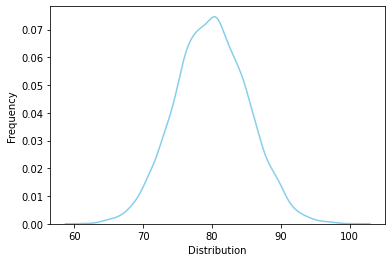

In [14]:
# 시험점수가 N(80, 5.2)(평균:80, 표준편차:5.2)인 정규분포에서 82점일 확률
mu = 80
std = 5.2
# scipy 의 statistics 패키지를 이용하여 정규분포에서 원하는 값 계산
# https://docs.scipy.org/doc/scipy/tutorial/stats.html
rv = sp.stats.norm(loc=mu, scale=std)

# 확률밀도함수(Probability density function)
print(f"f(82)={rv.pdf(82.0):.3f}") 
# 누적분포함수(Cumulative distribution function): P(X <= 82): 82점 이하일 확률
print(f"F(82)={rv.cdf(82.0):.3f}")
# Survival Function (1-CDF): P(X >= 82): 82점 이상일 확률
print(f"1 - F(82)={rv.sf(82.0):.3f}")
# 기대값(Expted value), 분산 (Variance)
print(f"E(X)={rv.mean():.3f}, V(X)={rv.var():.3f}")

# 상위 % 를 가지는 값 구하기 
# Percent Point Function (Inverse of CDF): P(X <= x) = 90% 일때, x의 값
print(f"Top 10% point with ppf: {rv.ppf(0.90):.3f}")
# Inverse Survival Function (Inverse of SF): P(X >= x) = 10% 일때, x의 값
print(f"Top 10% point with isf: {rv.isf(0.10):.3f}")
# 중위 90% 확률을 가지는 구간
print(f"중위 90% interval: {rv.interval(0.9)[0]:.3f} < x < {rv.interval(0.9)[1]:.3f}")
# 상위 5%, 하위 5% 점수 구간
print(f"상하위 5% interval with ppf: x < {rv.ppf(0.05):.3f}, {rv.ppf(0.95):.3f} < x")
print(f"상하위 5% interval with isf: x < {rv.isf(0.95):.3f}, {rv.isf(0.05):.3f} < x")

rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, bins=100, kde=True, hist=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

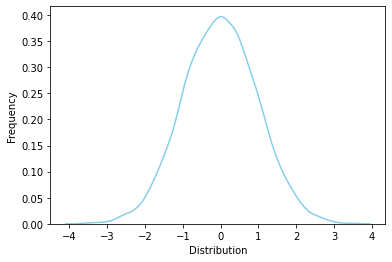

In [15]:
# 표준정규분포 (Z-distribution) N(0,1)
rv = sp.stats.norm(loc=0, scale=1)
rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, bins=100, kde=True, hist=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

**Q-Q Plot (Quantile-Quantile Plot)**

정규분포인지를 살펴보기 위한 다른 시각화 방식은 Q-Q Plot 입니다. Q-Q Plot 은 정규분포와 실제 데이터의 같은 Quantile 상의 데이터를 샘플링해 point를 찍어 봄으로써 두 분포가 유사한지를 시각화하여 판단하는 방식입니다. point 들이 직선을 이룬다면 두 분포는 같은 정규분포일 가능성이 높습니다.


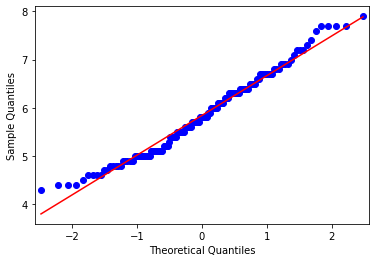

In [16]:
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(df_iris['Sepal.Length'], line='s')
plt.show()

### 지수분포 (Exponential Distribution)

어떤 사건이 발생하는 간격(시간)이 따르는 분포

**확률밀도함수**

단위 시간당 평균 $\lambda$번 발생하는 사건의 발생 간격을 따를 때, 

$$f(x) = \lambda e^{-\lambda x} \quad (x \geq 0)$$

**기대값과 분산**

$$E(X) = \frac{1}{\lambda} \quad V(X) = \frac{1}{\lambda^2}$$


![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Exponential_probability_density.svg/325px-Exponential_probability_density.svg.png)

https://en.wikipedia.org/wiki/Exponential_distribution

**Further Reading**
* [Exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)

f(1)=0.271, f(3)=0.005
F(1)=0.865, F(3)=0.998
E(X)=0.500, V(X)=0.250


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

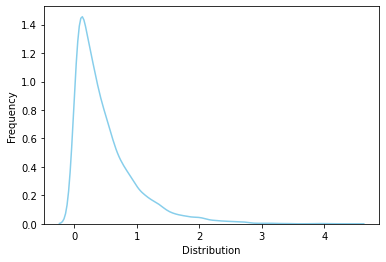

In [17]:
# 한달 평균 2건의 교통사고가 발생하는 지역에서 한달 교통사고 발생 간격
l = 2
rv = sp.stats.expon(scale=1.0/l)

print(f"f(1)={rv.pdf(1):.3f}, f(3)={rv.pdf(3):.3f}")
# 1달안에 교통사고가 발생할 확률, 3달안에 교통사고가 발생할 확률
print(f"F(1)={rv.cdf(1):.3f}, F(3)={rv.cdf(3):.3f}")
print(f"E(X)={rv.mean():.3f}, V(X)={rv.var():.3f}")

# 랜덤 샘플링 후 시각화
rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, bins=30, kde=True, hist=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

### 카이제곱 분포 (Chi-squared($x^2$) Distribution)

추정과 검정에 사용되는 특수한 확률분포 중 하나, 분산의 구간 추정이나 독립성 검정에 사용

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Chi-square_distributionPDF.png/270px-Chi-square_distributionPDF.png)

https://ko.wikipedia.org/wiki/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1_%EB%B6%84%ED%8F%AC

**Further Reading**
* [카이제곱 분포](https://ko.wikipedia.org/wiki/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1_%EB%B6%84%ED%8F%AC)
* [Chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution)

[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

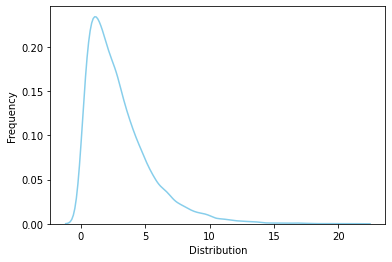

In [18]:
# Chi-squared distribution degree of freedom = 3
rv = sp.stats.chi2(df=3)

rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, bins=100, kde=True, hist=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

### T 분포 (T Distribution)

추정과 검정에 사용되는 특수한 확률분포 중 하나, 모분산을 알 수 없고, 표본 크기가 작을 때 정규분포 Z값 대신 T 분포의 T값을 이용해 추정 또는 검정에 사용 

$$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/325px-Student_t_pdf.svg.png)

https://en.wikipedia.org/wiki/Student%27s_t-distribution

**Further Reading**
* [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)


[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

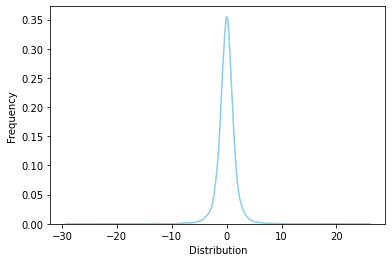

In [19]:
# T-distribution degree of freedom = 3
rv = sp.stats.t(df=3)

rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, bins=100, kde=True, hist=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

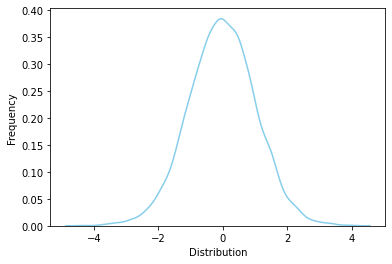

In [20]:
# T-distribution degree of freedom = 30, 정규분포와 가까워짐
rv = sp.stats.t(df=30)

rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, bins=100, kde=True, hist=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')

### F 분포 (F Distribution)

분산분석 등에서 사용되는 확률 분포

확률변수 $Y_1$, $Y_2$는 서로 독립이고, 각 카이제곱분포를 따를 때($Y_1 \sim x^2(n_1)$, $Y_2 \sim x^2(n_2)$),

$$F = \frac{\frac{Y_1}{n_1}}{\frac{Y_2}{n_2}}$$

의 확률분포를 자유도가 $n_1$, $n_2$인 F분포 $F(n_1, n_2)$

[Text(0.5, 0, 'Distribution'), Text(0, 0.5, 'Frequency')]

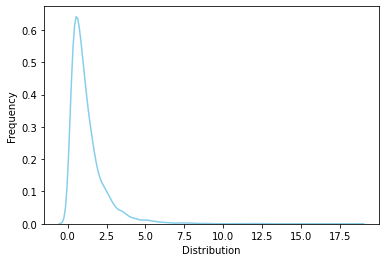

In [21]:
rv = sp.stats.f(5, 10)

rvs = rv.rvs(size=10000)
ax = sns.distplot(rvs, bins=100, kde=True, hist=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution', ylabel='Frequency')